<a href="https://colab.research.google.com/github/pichiboii/krispi/blob/main/Copy_of_masters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import xgboost as xgb
from matplotlib import pyplot as plt
import seaborn as sns
import re
from imblearn.over_sampling import SMOTENC

pd.set_option("display.max_columns", None)

# Pre-EDA


| Column                           | Description                                                                                          |
| -------------------------------- | ---------------------------------------------------------------------------------------------------- |
| policy_id                        | Unique identifier of the policyholder                                                                |
| policy_tenure                    | Time period of the policy                                                                            |
| age_of_car                       | Normalized age of car in years                                                                       |
| age_of_policyholder              | Normalized age of policyholder in years                                                              |
| area_cluster                     | Area cluster of the policyholder                                                                     |
| population_density               | Population density of the city (Policyholder City)                                                   |
| make                             | Encoded Manufacturer/company of the car                                                              |
| segment                          | Segment of the car (A/B1/B2/C1/C2)                                                                   |
| model                            | Encoded name of the car                                                                              |
| fuel_type                        | Type of fuel used by the car                                                                         |
| max_torque                       | Maximum torque generated by the car (Nm@rpm)                                                         |
| max_power                        | Maximum Power generated by the car (bhp@rpm)                                                         |
| engine_type                      | Type of engine used in the car                                                                       |
| airbags                          | Number of airbags installed in the car                                                               |
| is_esc                           | Boolean flag indicating whether Electronic Stability Control (ESC) is present in the car or not      |
| is_adjustable_steering           | Boolean flag indicating whether the streering wheel of the car is adjustable or not                  |
| is_tpms                          | Boolean flag indicating whether Tyre Pressure Monitoring System (TPMS) is present in the car or not  |
| is_parking_sensors               | Boolean flag indicating whether parking sensors are present in the car or not                        |
| is_parking_camera                | Boolean flag indicating whether the parking camera is present in the car or not                      |
| rear_brakes_type                 | Type of brakes used in the rear of the car                                                           |
| displacement                     | Engine displacement of the car (cc)                                                                  |
| cylinder                         | Number of cylinders present in the engine of the car                                                 |
| transmission_type                | Transmission type of the car                                                                         |
| gear_box                         | Number of gears in the car                                                                           |
| steering_type                    | Type of the power steering present in the car                                                        |
| turning_radius                   | The space a vehicle needs to make a certain turn (Meters)                                            |
| length                           | Length of the car (Milimetre)                                                                        |
| width                            | Width of the car (Milimetre)                                                                         |
| height                           | Heigh of the car (Milimetre)                                                                         |
| gross_weight                     | The maximum allowable weight of the fully-loaded car, including passengers, cargo and equipment (Kg) |
| is_front_fog_light               | Boolean flag indicating whether front fog lights are available in the car or not                     |
| is_rear_window_wiper             | Boolean flag indicating whether the rear windows wiper is available in the car or not                |
| is_rear_window_washer            | Boolean flag indicating whether the rear windows washer is available in the car or not               |
| is_rear_window_defogger          | Boolean flag indicating whether rear window defogger is available in the car or not                  |
| is_brake_assist                  | Boolean flag indicating whether the brake assistance feature is available in the car or not          |
| is_power_door_lock               | Boolean flag indicating whether a power door lock is available in the car or not                     |
| is_central_locking               | Boolean flag indicating whether the central locking feature is available in the car or not           |
| is_power_streering               | Boolean flag indicating whether power steering is available in the car or not                        |
| is_driver_seat_height_adjustable | Boolean flag indicating whether the height of the driver seat is adjustable or not                   |
| is_day_night_rear_view_mirror    | Boolean flag indicating whether day & night rearview mirror is present in the car or not             |
| is_ecw                           | Boolean flag indicating whether Engine Check Warning (ECW) is available in the car or not            |
| is_speed_alert                   | Boolean flag indicating whether the speed alert system is available in the car or not                |
| ncap_rating                      | Safety rating given by NCAP (out of 5)                                                               |
| is_claim                         | Outcome: Boolean flag indicating whether the policyholder file a claim in the next 6 months or not   |


## Data Import


In [ ]:
data = pd.read_csv("Insurance claims data.csv")

In [ ]:
data

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,steering_type,turning_radius,length,width,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
0,POL045360,9.3,1.2,41,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,Power,5.2,4300,1790,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
1,POL016745,8.2,1.8,35,C2,27003,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,i-DTEC,2,No,Yes,No,Yes,Yes,Drum,1498,4,Manual,Electric,4.9,3995,1695,1051,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4,0
2,POL007194,9.5,0.2,44,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,Power,5.2,4300,1790,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
3,POL018146,5.2,0.4,44,C10,73430,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,Power,4.6,3445,1515,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
4,POL049011,10.1,1.0,56,C13,5410,B2,M5,Diesel,200Nm@3000rpm,88.77bhp@4000rpm,1.5 Turbocharged Revotorq,2,No,Yes,No,Yes,No,Drum,1497,4,Manual,Electric,5.0,3990,1755,1490,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,POL019269,10.6,2.6,48,C5,34738,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,Electric,4.8,3845,1735,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58588,POL001254,2.3,2.2,37,C3,4076,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,Power,5.2,4300,1790,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3,0
58589,POL019859,6.6,2.2,35,C8,8794,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,Electric,4.8,3845,1735,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
58590,POL014061,4.1,3.6,44,C8,8794,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,Electric,4.8,3845,1735,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0


## Data Splitting


In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    data.drop(columns=["claim_status"]),
    data["claim_status"],
    test_size=0.2,
    random_state=42,
    stratify=data["claim_status"],
)
X_train_raw

,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,steering_type,turning_radius,length,width,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
47157,POL034603,9.8,1.6,36,C3,4076,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,Power,5.2,4300,1790,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
58129,POL019539,12.2,0.2,49,C5,34738,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,Power,4.6,3445,1515,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
35007,POL052516,2.2,1.6,39,C8,8794,C2,M4,Diesel,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,Yes,Yes,Yes,Yes,Yes,Disc,1493,4,Automatic,Power,5.2,4300,1790,1720,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,3
6067,POL046725,0.6,0.4,45,C2,27003,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,Power,4.6,3445,1515,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
34788,POL037955,5.3,2.2,44,C8,8794,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,Electric,4.8,3845,1735,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33391,POL029354,3.1,0.2,37,C5,34738,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,Power,4.6,3445,1515,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
56104,POL007729,7.4,0.4,39,C22,16733,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,Power,4.6,3445,1515,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
10467,POL036502,11.7,1.6,37,C8,8794,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,Electric,4.8,3845,1735,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
34818,POL010827,0.9,0.8,52,C7,6112,C1,M9,Diesel,200Nm@1750rpm,97.89bhp@3600rpm,i-DTEC,2,No,Yes,No,Yes,Yes,Drum,1498,4,Manual,Electric,4.9,3995,1695,1051,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,4


# EDA (simple)


In [ ]:
train_data = pd.concat([X_train_raw, y_train], axis=1)

In [ ]:
train_data.isna().sum()


,0
policy_id,0
subscription_length,0
vehicle_age,0
customer_age,0
region_code,0
region_density,0
segment,0
model,0
fuel_type,0
max_torque,0


In [ ]:
train_data.describe(include="all")


,policy_id,subscription_length,vehicle_age,customer_age,region_code,region_density,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,steering_type,turning_radius,length,width,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,claim_status
count,46873,46873.000000,46873.000000,46873.000000,46873,46873.000000,46873,46873,46873,46873,46873,46873,46873.000000,46873,46873,46873,46873,46873,46873,46873.000000,46873.000000,46873,46873,46873.000000,46873.000000,46873.000000,46873.000000,46873,46873,46873,46873,46873,46873,46873,46873,46873,46873,46873,46873,46873.000000,46873.000000
unique,46873,NaN,NaN,NaN,22,NaN,6,11,3,9,9,11,NaN,2,2,2,2,2,2,NaN,NaN,2,3,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2,2,2,2,2,2,NaN,NaN
top,POL044179,NaN,NaN,NaN,C8,NaN,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,NaN,No,Yes,No,Yes,No,Drum,NaN,NaN,Manual,Power,NaN,NaN,NaN,NaN,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,NaN,NaN
freq,1,NaN,NaN,NaN,10865,NaN,14662,11952,16479,14267,14267,11952,NaN,32203,28401,35681,44946,28586,35681,NaN,NaN,30561,26786,NaN,NaN,NaN,NaN,27149,33345,33345,30513,25744,33970,33970,45922,27434,28989,33970,46588,NaN,NaN
mean,NaN,6.111260,1.386244,44.824697,NaN,18839.992981,NaN,NaN,NaN,NaN,NaN,NaN,3.134150,NaN,NaN,NaN,NaN,NaN,NaN,1161.892369,3.626203,NaN,NaN,4.852749,3850.053485,1672.163250,1384.802552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.759030,0.063960
std,NaN,4.145158,1.133260,6.939567,NaN,17662.347963,NaN,NaN,NaN,NaN,NaN,NaN,1.830797,NaN,NaN,NaN,NaN,NaN,NaN,266.101357,0.483816,NaN,NaN,0.227836,311.251757,111.996014,212.314472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.385833,0.244684
min,NaN,0.000000,0.000000,35.000000,NaN,290.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,796.000000,3.000000,NaN,NaN,4.500000,3445.000000,1475.000000,1051.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,2.100000,0.400000,39.000000,NaN,6112.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,796.000000,3.000000,NaN,NaN,4.600000,3445.000000,1515.000000,1185.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,NaN,5.700000,1.200000,44.000000,NaN,8794.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,1197.000000,4.000000,NaN,NaN,4.800000,3845.000000,1735.000000,1335.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000
75%,NaN,10.400000,2.200000,49.000000,NaN,27003.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,1493.000000,4.000000,NaN,NaN,5.000000,3995.000000,1755.000000,1510.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,0.000000


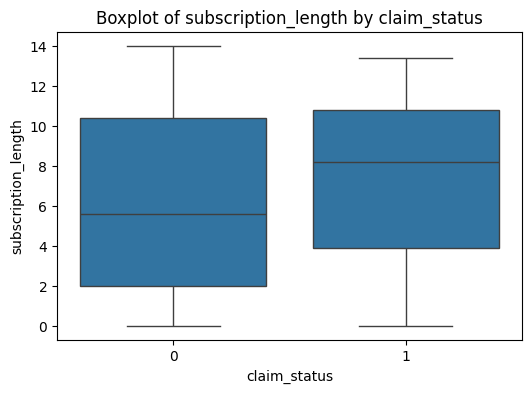

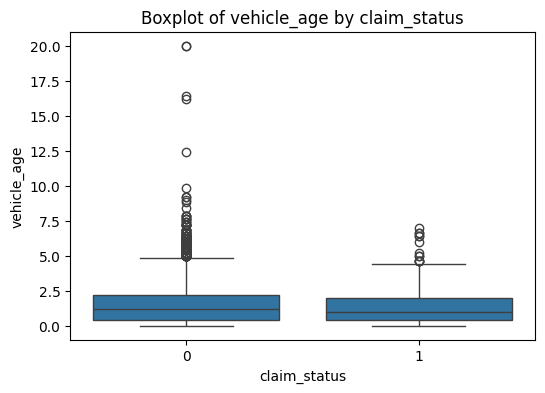

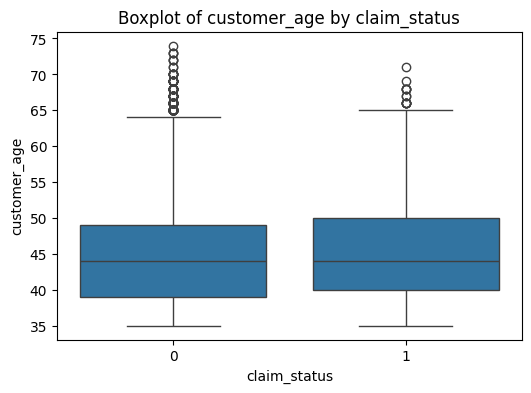

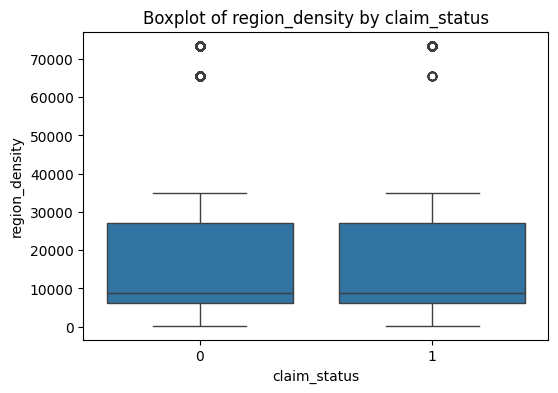

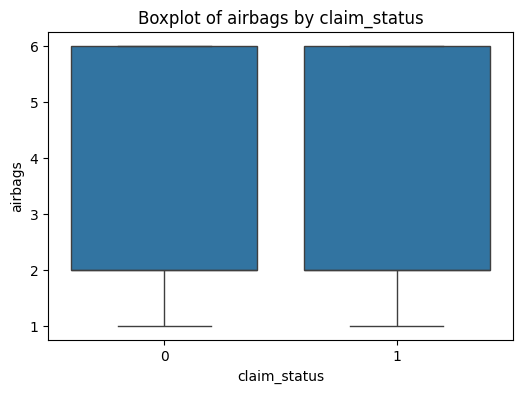

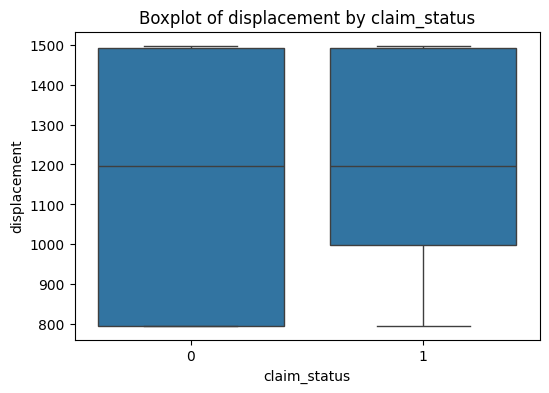

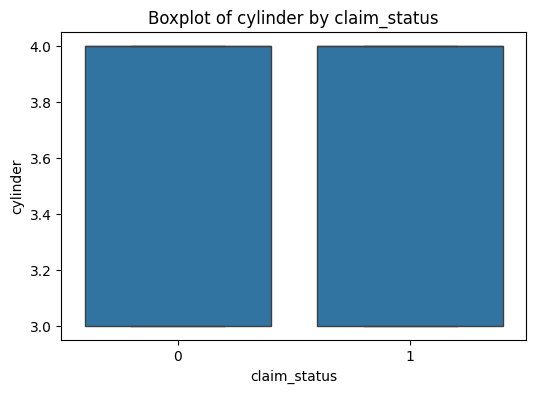

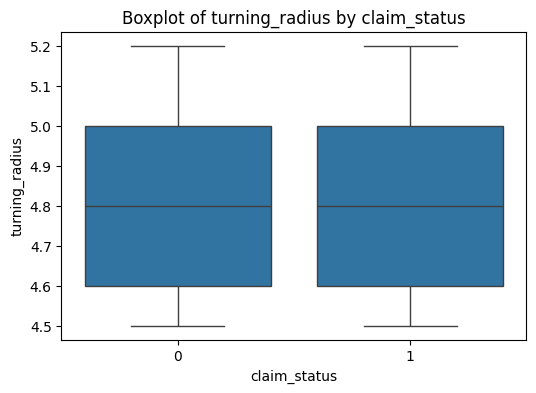

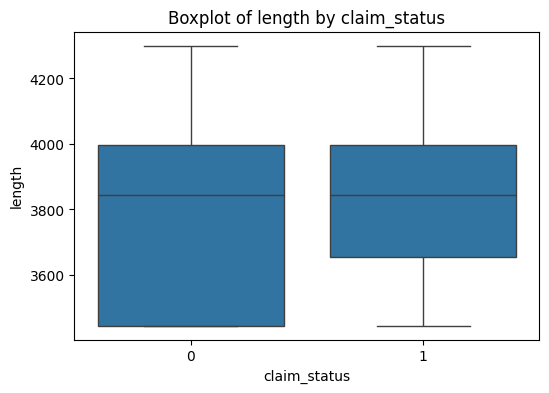

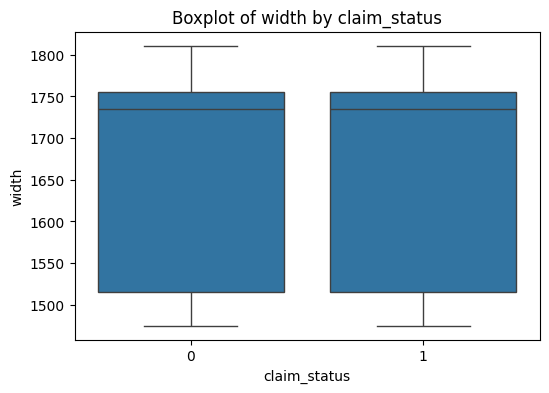

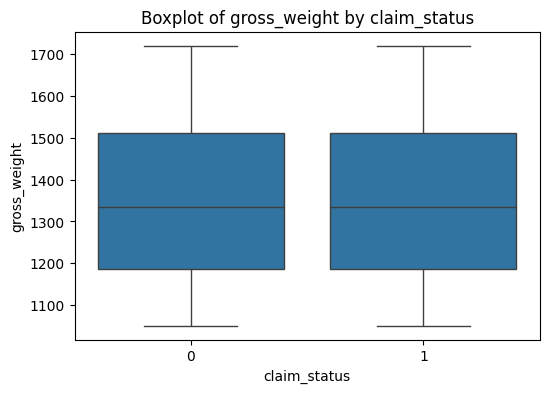

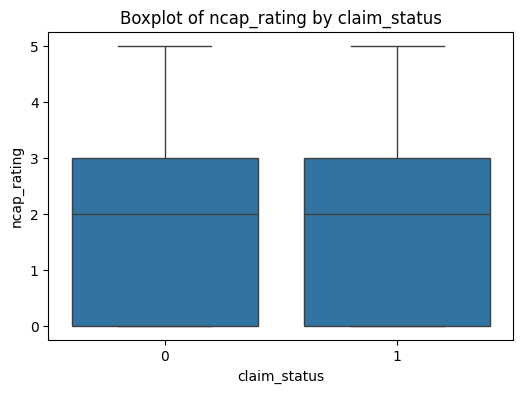

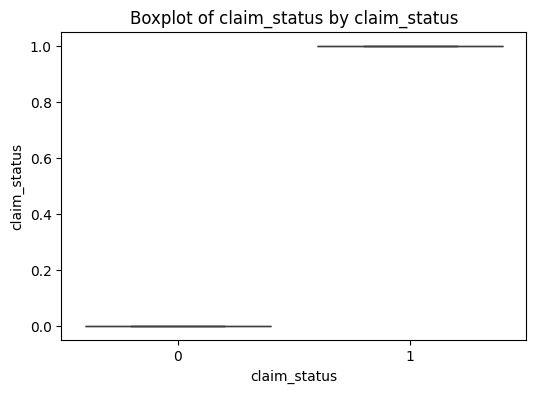

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# ambil hanya kolom numerik
numeric_cols = train_data.select_dtypes(include=["int64", "float64"]).columns

# bikin boxplot untuk tiap kolom numerik
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=train_data, x="claim_status", y=col)
    plt.title(f"Boxplot of {col} by claim_status")
    plt.show()

consider drop or OHE:

- area_cluster
- segment
- model
- fuel_type
- engine_type
- make
- rear_brakes_type
- transmission_type
- steering_type
-

extract and normalize:

- max_torque
- max_power

fix value:

- ncap_rating


# Preprocessing


In [ ]:
def preprocessing(df):
    df = df.copy()
    df = df.drop(
        columns=[
            "policy_id",
        ],
    )

    def normalize_power(x):
        if pd.isna(x):
            return x
        numbers = re.findall(r"\d+\.?\d*", x)
        if len(numbers) == 2:
            return float(numbers[0]) / float(numbers[1])
        return None

    df["max_power"] = df["max_power"].apply(normalize_power)

    def normalize_torque(x):
        if pd.isna(x):
            return x
        numbers = re.findall(r"\d+\.?\d*", x)
        if len(numbers) == 2:
            return float(numbers[0]) / float(numbers[1])
        return None

    df["max_torque"] = df["max_torque"].apply(normalize_torque)

    df["is_esc"] = df["is_esc"].apply(lambda x: 1 if x.lower() == "yes" else 0)
    df["is_adjustable_steering"] = df["is_adjustable_steering"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_tpms"] = df["is_tpms"].apply(lambda x: 1 if x.lower() == "yes" else 0)
    df["is_parking_sensors"] = df["is_parking_sensors"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_parking_camera"] = df["is_parking_camera"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_front_fog_lights"] = df["is_front_fog_lights"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_rear_window_wiper"] = df["is_rear_window_wiper"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_rear_window_washer"] = df["is_rear_window_washer"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_rear_window_defogger"] = df["is_rear_window_defogger"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_brake_assist"] = df["is_brake_assist"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_power_door_locks"] = df["is_power_door_locks"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_central_locking"] = df["is_central_locking"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_power_steering"] = df["is_power_steering"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_driver_seat_height_adjustable"] = df[
        "is_driver_seat_height_adjustable"
    ].apply(lambda x: 1 if x.lower() == "yes" else 0)
    df["is_day_night_rear_view_mirror"] = df["is_day_night_rear_view_mirror"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["is_ecw"] = df["is_ecw"].apply(lambda x: 1 if x.lower() == "yes" else 0)
    df["is_speed_alert"] = df["is_speed_alert"].apply(
        lambda x: 1 if x.lower() == "yes" else 0
    )
    df["ncap_rating"] = df["ncap_rating"].apply(lambda x: 1 if x == 0 else x)

    cats = [
        "region_code",
        "segment",
        "model",
        "fuel_type",
        "engine_type",
        "rear_brakes_type",
        "transmission_type",
        "steering_type"
        ]

    df = pd.get_dummies(df, columns=cats, drop_first=True)

    return df


X_train = preprocessing(X_train_raw)
X_test = preprocessing(X_test_raw)

categorical_features_saved = [
    "is_esc",
    "is_adjustable_steering",
    "is_tpms",
    "is_parking_sensors",
    "is_parking_camera",
    "is_front_fog_lights",
    "is_rear_window_wiper",
    "is_rear_window_washer",
    "is_rear_window_defogger",
    "is_brake_assist",
    "is_power_door_locks",
    "is_central_locking",
    "is_power_steering",
    "is_driver_seat_height_adjustable",
    "is_day_night_rear_view_mirror",
    "is_ecw",
    "is_speed_alert",
    "ncap_rating",
    "region_code",
    "segment",
    "model",
    "fuel_type",
    "engine_type",
    "rear_brakes_type",
    "transmission_type",
    "steering_type"
]
categorical_features = [col for col in X_train.columns if any(feat in col for feat in categorical_features_saved)]
categorical_indices = [X_train.columns.get_loc(col) for col in categorical_features]

smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_train_smote, y_train_smote = smote_nc.fit_resample(X_train, y_train)


In [ ]:
print(X_train.shape)
print(X_train_smote.shape)
print(y_train.shape)
print(y_train_smote.shape)
print(X_test.shape)
print(y_test.shape)

(46873, 83)
(87750, 83)
(46873,)
(87750,)
(11719, 83)
(11719,)


# Modeling


In [ ]:
model = XGBClassifier()
model.fit(X_train, y_train)

model_smote = XGBClassifier()
model_smote.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

# Evaluation


In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("Without SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

y_pred_smote = model_smote.predict(X_test)
y_proba_smote = model_smote.predict_proba(X_test)[:, 1]
print("\nWith SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote))
print("Recall:", recall_score(y_test, y_pred_smote))
print("F1 Score:", f1_score(y_test, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_smote))


Without SMOTE:
Accuracy: 0.9355747077395682
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.626779287081776

With SMOTE:
Accuracy: 0.9076713030122024
Precision: 0.1175115207373272
Recall: 0.068
F1 Score: 0.08614864864864864
ROC AUC Score: 0.6138360835080682


Without SMOTE:
Accuracy: 0.9355747077395682
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.626779287081776


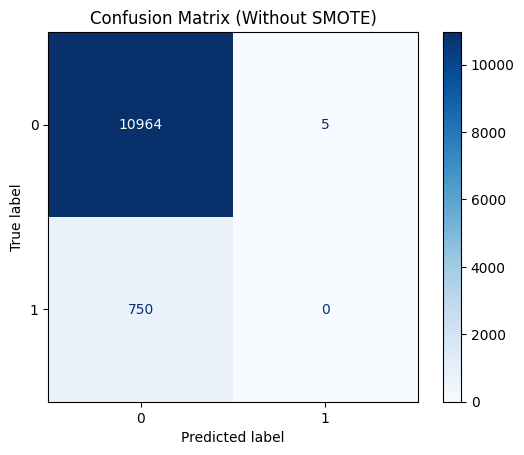


With SMOTE:
Accuracy: 0.9076713030122024
Precision: 0.1175115207373272
Recall: 0.068
F1 Score: 0.08614864864864864
ROC AUC Score: 0.6138360835080682


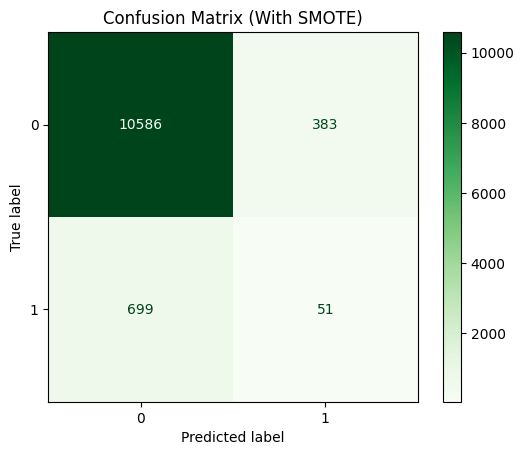

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Prediksi tanpa SMOTE
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

print("Without SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix tanpa SMOTE
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Without SMOTE)")
plt.show()

# Prediksi dengan SMOTE
y_pred_smote = model_smote.predict(X_test)
y_proba_smote = model_smote.predict_proba(X_test)[:, 1]

print("\nWith SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Precision:", precision_score(y_test, y_pred_smote))
print("Recall:", recall_score(y_test, y_pred_smote))
print("F1 Score:", f1_score(y_test, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_smote))

# Confusion Matrix dengan SMOTE
cm_smote = confusion_matrix(y_test, y_pred_smote)
disp_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=model_smote.classes_)
disp_smote.plot(cmap="Greens")
plt.title("Confusion Matrix (With SMOTE)")
plt.show()

# Hyperparameter Tuning

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "gamma": [0, 1]
}

# Inisialisasi model
xgb_base = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# GridSearch
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring="roc_auc",   # bisa diganti ke "roc_auc", "recall", dll
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Fit di data training (tanpa SMOTE)
grid_search.fit(X_train, y_train)

print("Best Parameters (Without SMOTE):", grid_search.best_params_)
print("Best Score (CV):", grid_search.best_score_)

# Pakai model terbaik hasil tuning
model_grid = grid_search.best_estimator_
model_grid.fit(X_train, y_train)


# ====== Sekarang untuk data SMOTE ======
grid_search_smote = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_smote.fit(X_train_smote, y_train_smote)

print("Best Parameters (With SMOTE):", grid_search_smote.best_params_)
print("Best Score (CV):", grid_search_smote.best_score_)

# Model terbaik hasil tuning SMOTE
model_smote_grid = grid_search_smote.best_estimator_
model_smote_grid.fit(X_train_smote, y_train_smote)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:37:02] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters (Without SMOTE): {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Score (CV): 0.6531618085093641


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:37:04] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Fitting 3 folds for each of 144 candidates, totalling 432 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:51:51] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters (With SMOTE): {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best Score (CV): 0.9654247912922784


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:51:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

Without SMOTE:
Accuracy: 0.9360013653042069
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.6613811043243079


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


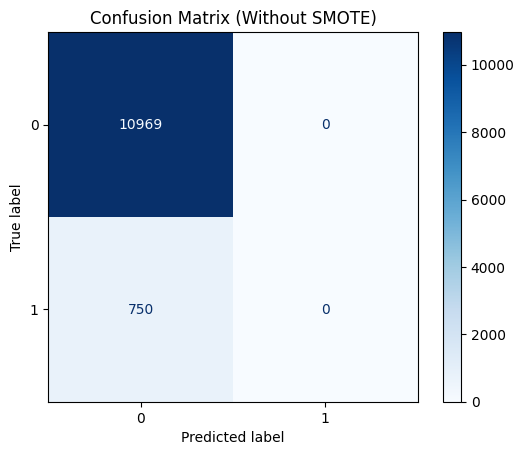


With SMOTE:
Accuracy: 0.9106579059646728
Precision: 0.11825192802056556
Recall: 0.06133333333333333
F1 Score: 0.08077260755048288
ROC AUC Score: 0.6118503661834868


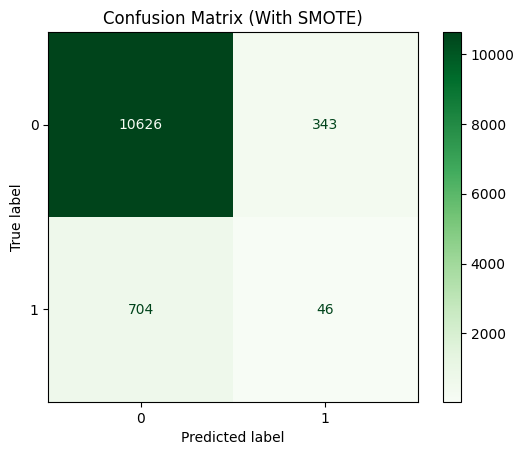

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Prediksi tanpa SMOTE
y_pred_grid = model_grid.predict(X_test)
y_proba_grid = model_grid.predict_proba(X_test)[:, 1]

print("Without SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_grid))
print("Precision:", precision_score(y_test, y_pred_grid))
print("Recall:", recall_score(y_test, y_pred_grid))
print("F1 Score:", f1_score(y_test, y_pred_grid))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_grid))

# Confusion Matrix tanpa SMOTE
cm = confusion_matrix(y_test, y_pred_grid)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (Without SMOTE)")
plt.show()

# Prediksi dengan SMOTE
y_pred_smote_grid = model_smote_grid.predict(X_test)
y_proba_smote_grid = model_smote_grid.predict_proba(X_test)[:, 1]

print("\nWith SMOTE:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote_grid))
print("Precision:", precision_score(y_test, y_pred_smote_grid))
print("Recall:", recall_score(y_test, y_pred_smote_grid))
print("F1 Score:", f1_score(y_test, y_pred_smote_grid))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_smote_grid))

# Confusion Matrix dengan SMOTE
cm_smote = confusion_matrix(y_test, y_pred_smote_grid)
disp_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=model_smote.classes_)
disp_smote.plot(cmap="Greens")
plt.title("Confusion Matrix (With SMOTE)")
plt.show()

# Try random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_model_smote = RandomForestClassifier(random_state=42)
rf_model_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

Without SMOTE (Random Forest):
Accuracy: 0.9289188497312058
Precision: 0.13274336283185842
Recall: 0.02
F1 Score: 0.03476245654692932
ROC AUC Score: 0.5758566262497341


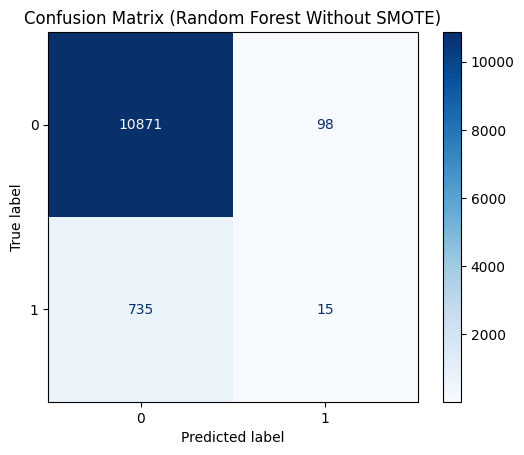


With SMOTE (Random Forest):
Accuracy: 0.8528884717126035
Precision: 0.08304794520547945
Recall: 0.12933333333333333
F1 Score: 0.10114702815432743
ROC AUC Score: 0.5808853435439268


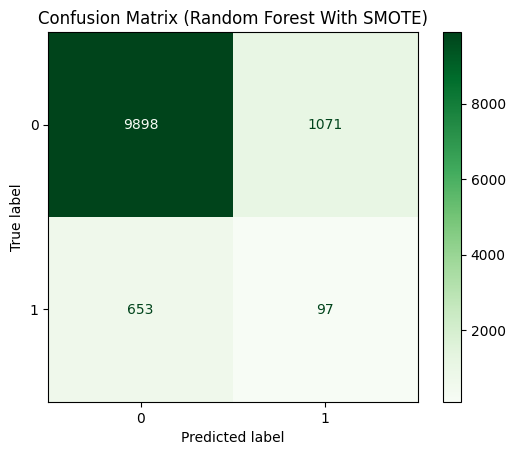

In [ ]:
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

print("Without SMOTE (Random Forest):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap="Blues")
plt.title("Confusion Matrix (Random Forest Without SMOTE)")
plt.show()

y_pred_rf_smote = rf_model_smote.predict(X_test)
y_proba_rf_smote = rf_model_smote.predict_proba(X_test)[:, 1]

print("\nWith SMOTE (Random Forest):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print("Precision:", precision_score(y_test, y_pred_rf_smote))
print("Recall:", recall_score(y_test, y_pred_rf_smote))
print("F1 Score:", f1_score(y_test, y_pred_rf_smote))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf_smote))

cm_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
disp_rf_smote = ConfusionMatrixDisplay(confusion_matrix=cm_rf_smote, display_labels=rf_model_smote.classes_)
disp_rf_smote.plot(cmap="Greens")
plt.title("Confusion Matrix (Random Forest With SMOTE)")
plt.show()
